# EDSA - Climate Change Belief Analysis 2022

© Explore Data Science Academy

---
### Honour Code

We as Team *2201FTDS_GM4* consisting of {**Alette Baloyi, Nkoka Khosa, Precious Montsha, Mahlatse Philix Ramabopa, Roger Arendse, and Wezo Ntsokota**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. Pipeline Developement</a>

<a href=#nine>9. Preparing the test data and submission file </a>

<a href=#ten>10. Final Thoughts and reccomendations</a>



## Data Description

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between **Apr 27, 2015 and Feb 21, 2018.** In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id


 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



In [122]:

# Importing modules
import nltk
#import 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string

nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
# Regular expression
import re

# to make bag of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Packages to create models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC  
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.utils import resample

# Save trained models
import pickle


import warnings
warnings.filterwarnings('ignore')
# Magic function to enable graphs and plots to be plotted below the cell where your plotting commands are written
%matplotlib inline

# Set plot style
sns.set()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\F5471036\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\F5471036\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [123]:

# Downloading the 'tokenize' and 'stopwords'
#nltk.download()


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [124]:

#This is our training data for the model 
df_train = pd.read_csv("train.csv")
pd.set_option('display.max_colwidth',None)

In [125]:
# Load the data
test_df = pd.read_csv('test.csv')

In [126]:
train = df_train.copy()


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


With Data Analysis, we will Identify the target and features by looking at a sample of the data, look at the data information and the shape, Check for null values, Check and identify unique target values.

In [127]:

# Viewing the first 5 observations of the train data
df_train.head()


,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [128]:

# Viewing the last 5 observations of the train data
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [129]:

# Checking the data types of all the columns we have in our data
df_train.dtypes


sentiment     int64
message      object
tweetid       int64
dtype: object

In [130]:

# Viewing the dimension or the size of our train DataFrame
df_train.shape


(15819, 3)

### 3.1 Looking at Data Statistics

In [131]:

# Looking into our 'df_train' to check for missing values 
df_train.isnull().sum()


sentiment    0
message      0
tweetid      0
dtype: int64

In [132]:

# Print off a list of all sentiment classes present in this dataset.
class_labels = list(df_train.sentiment.unique())
print(class_labels)


[1, 2, 0, -1]


## data visualisations

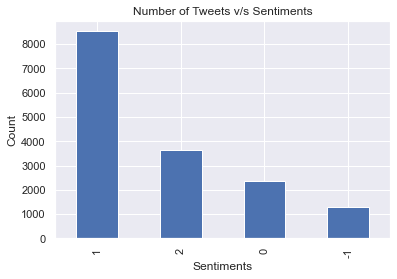

In [133]:

# Plotting the bar graph to see the distrinution of our 'df_train' sentiment.
labels = ['1', '2','0','-1']
bargraph = df_train["sentiment"].value_counts()
bargraph.plot(kind = "bar", title = "Number of Tweets v/s Sentiments", xlabel = "Sentiments", ylabel = "Count")
plt.show()


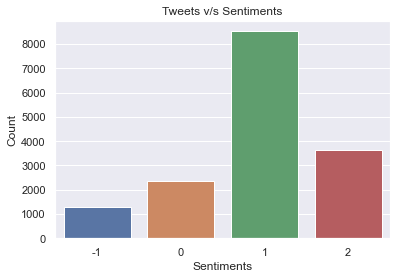

In [134]:

# Plotting the bar graph to see the distrinution of our 'df_train' sentiment with our classses arragend.
sns.barplot(x = bargraph.index, y = bargraph, data = df_train).set_title("Tweets v/s Sentiments")
plt.ylabel("Count")
plt.xlabel("Sentiments")
plt.show()


### ---

In [135]:
#Making a copy of the the tweet dataframe from which we will create a dictionary of the sentiments
twiter = df_train.copy()

# Create a dicionary to assign each sentiment
sentiment_df = {-1: "Anti", 0: "Neutral", 1: "Pro", 2: "News"}
twiter["sentiment"] = df_train["sentiment"].apply(lambda num: sentiment_df[num])


In [136]:
# Count the amount of values for each sentiment
twiter["sentiment"].value_counts()

Pro        8530
News       3640
Neutral    2353
Anti       1296
Name: sentiment, dtype: int64

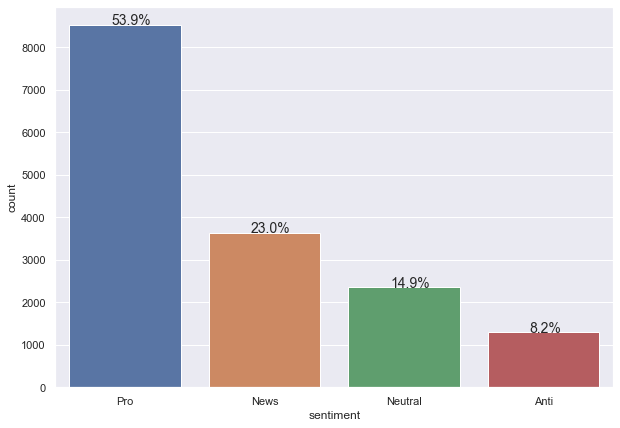

In [137]:
targets = twiter['sentiment']                           # Identify the targets

#Creating a countplot for the features
sns.set(rc={'figure.figsize':(10,7)})
ax=sns.countplot(x=targets, data=twiter)

total = len(targets)                                          # length of the column
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the sentiment
    x = p.get_x() + p.get_width() / 2 - 0.1                   # width of the plot
    y = p.get_y() + p.get_height()                            # heightt of the plot
    ax.annotate(percentage, (x, y), size = 14)                # annotate the percantage 
    
plt.show() # show the plot

#### Wordclouds per sentiments

In [138]:
wordcloud_df= []    # Create a empty list
stop_words = stopwords.words('english')    # Declare stopwords
punct = string.punctuation    # Declare punctuation marks

message = df_train['message']    # Identify data to be cleaned

for i in range(len(message)):
    #Removing urls from messages
    tweet=re.sub(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?',' ',message.iloc[i]) 
    #Makes sure only letters are in the message
    tweet=re.sub('[^a-zA-Z]',' ',tweet)  
    #Convert all letters to lowercase and split them
    tweet=tweet.lower().split()   
    # Stems the words in tweet if it does notcontain stopwords and punctuation. 
    tweet=[word for word in tweet if (word not in stop_words) and (word not in punct)]  
    # Joining the cleaned split words
    tweet=' '.join(tweet)  
    # Creates a list of the cleaned tweets.
    wordcloud_df.append(tweet)  


In [139]:
df_train['message_clean'] = wordcloud_df    # Create a new column in the dataset
df_train['message_clean'].head()

0                   polyscimajor epa chief think carbon dioxide main cause global warming wait
1                                              like lack evidence anthropogenic global warming
2                              rt rawstory researchers say three years act climate change late
3                                           todayinmaker wired pivotal year war climate change
4    rt soynoviodetodas racist sexist climate change denying bigot leading polls electionnight
Name: message_clean, dtype: object

In [140]:
### seperate tweets according to their sentiment

pro_df = df_train[df_train['sentiment'] == 1]    # Identify the pro sentiment data
anti_df = df_train[df_train['sentiment'] == -1]    # Identify the anti sentiment data
neutral_df = df_train[df_train['sentiment'] == 0]    # Identify the neutral sentiment data
news_df = df_train[df_train['sentiment'] == 2]    # Identify the news sentiment data

### Wordcloud for Sentiment : 1 

In [141]:
# add stopwords
stopwords_plus = ["change","climate","rt", "global", "warming", "http","https"]

- Making all text lowercase

#### 3.2.2 Tokenisation

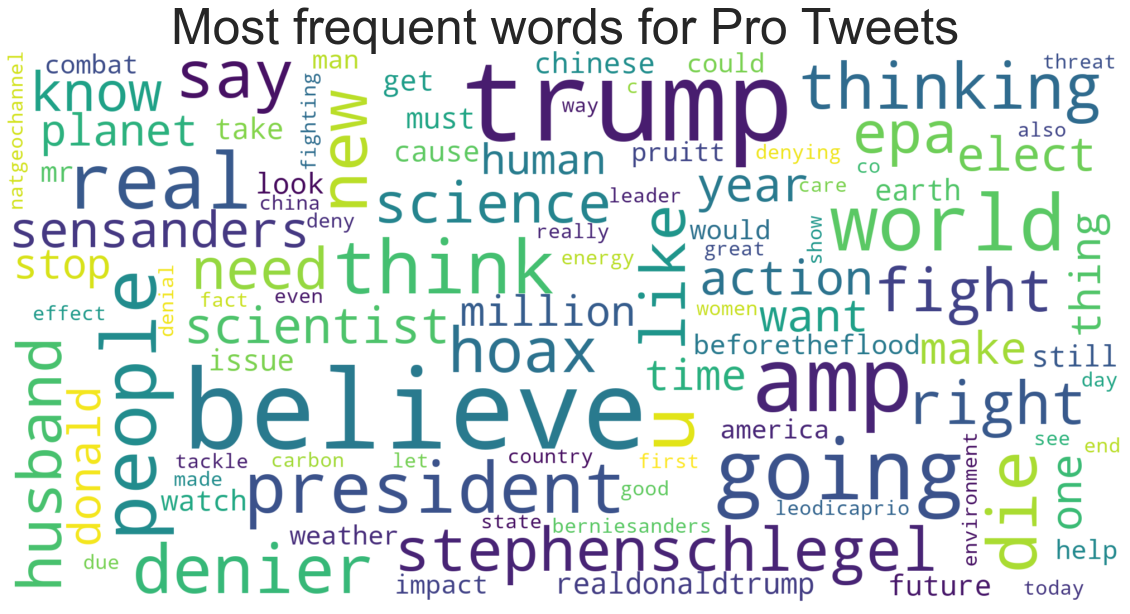

In [142]:
#This creates a list of single strings to generate the wordcloud.
prowc = pd.Series(pro_df['message_clean']).str.cat(sep=' ')   

# Create the wordcloud
wordcloud1 = WordCloud(width=2000,height=1000,max_font_size=200,max_words=100,stopwords=stopwords_plus,
                       collocations = False, background_color = 'white').generate(prowc)

plt.figure(figsize=(20,20))     # Specify the figure size
plt.imshow(wordcloud1, interpolation="bilinear")    # Initiate the wordcloud
plt.title('Most frequent words for Pro Tweets', fontsize=50)    # Specify a title
plt.axis("off")    # Remove the axis lines
plt.show()    # Show the wordcloud

The wordcloud above shows the 150 most frequent words used for the 1 Pro sentiment tweets. words such as "climate" and "change" should be removed because they do not add value, they frequently used because the tweets are about the climate change.

### wordcloud for sentiment 2 (news)

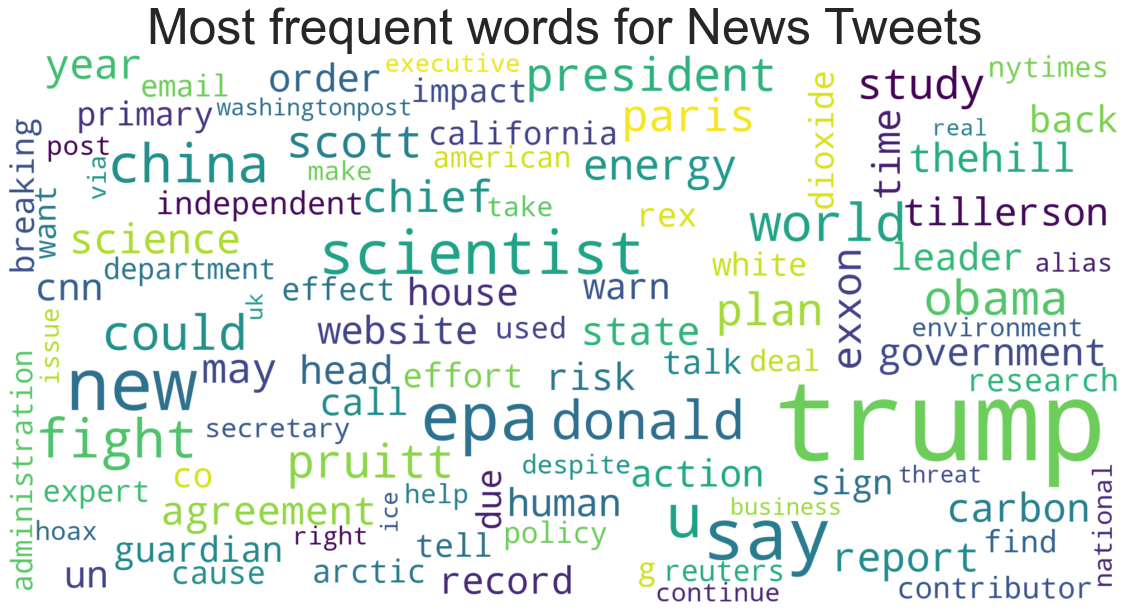

In [143]:
news_df_wc = pd.Series(news_df['message_clean']).str.cat(sep=" ")   

wordcloud_1 = WordCloud(width=2000,height=1000,max_font_size=200,max_words=100,stopwords=stopwords_plus,
                       collocations = False, background_color = 'white').generate(news_df_wc)  


plt.figure(figsize=(20,20))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.title('Most frequent words for News Tweets', fontsize=50)
plt.axis("off")
plt.show()

#### wordcloud sentiment -1 (Anti)

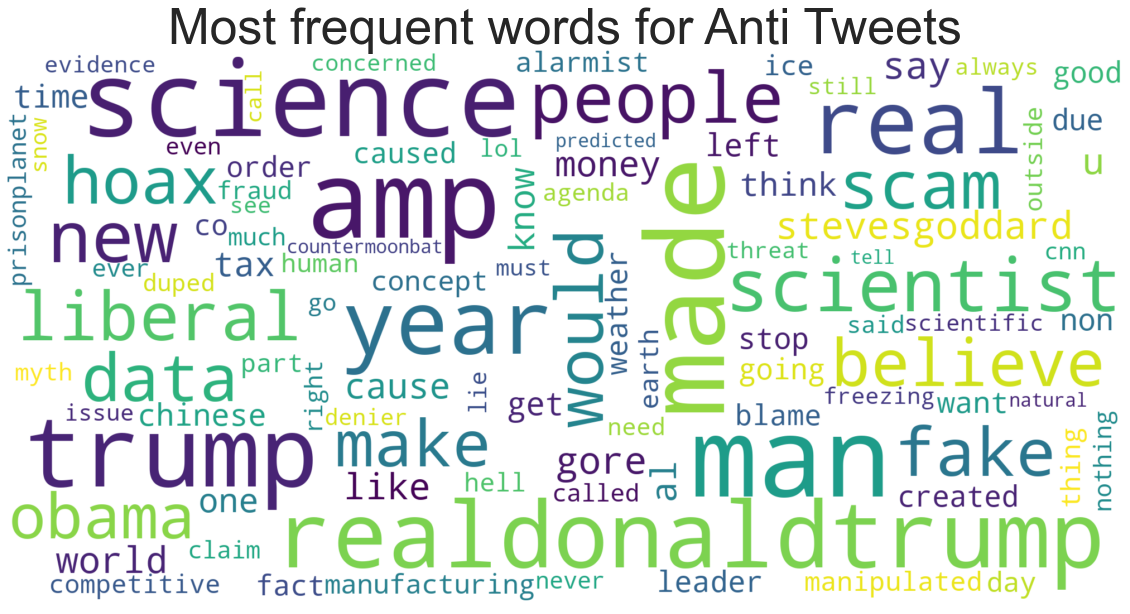

In [144]:
anti_df_wc = pd.Series(anti_df['message_clean']).str.cat(sep=' ')   #This creates a list of single strings to generate the wordcloud.

wordcloud_1 = WordCloud(width=2000,height=1000,max_font_size=200,max_words=100,stopwords=stopwords_plus,
                       collocations = False, background_color = 'white').generate(anti_df_wc)  


plt.figure(figsize=(20,20))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.title('Most frequent words for Anti Tweets', fontsize=50)
plt.axis("off")
plt.show()

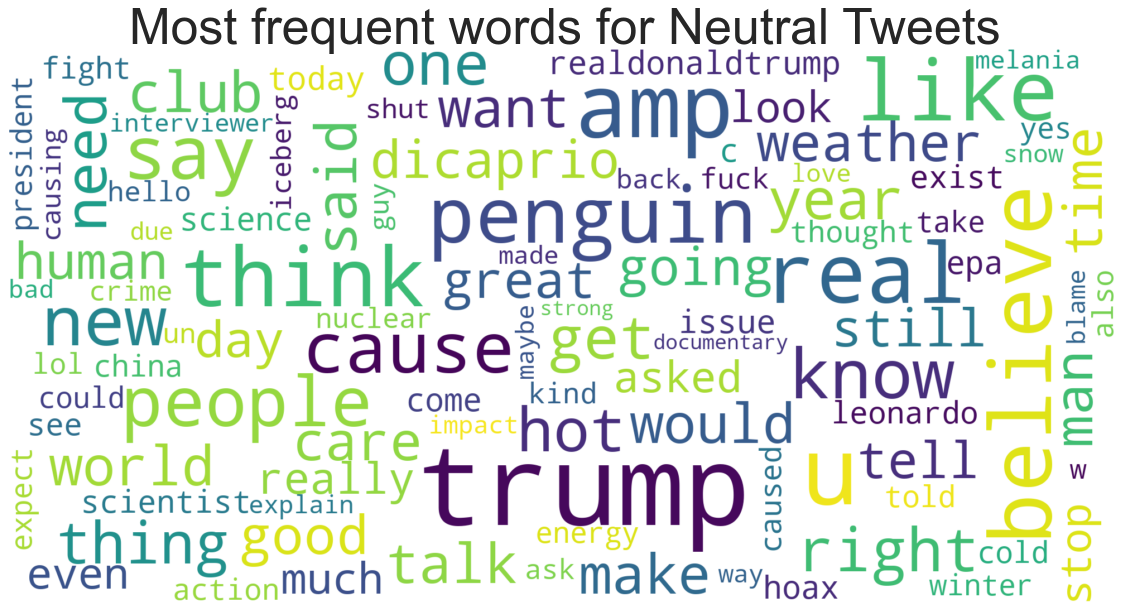

In [145]:
neutral_df_wc= pd.Series(neutral_df['message_clean']).str.cat(sep=' ')   #This creates a list of single strings to generate the wordcloud.

wordcloud_1 = WordCloud(width=2000,height=1000,max_font_size=200,max_words=100,stopwords=stopwords_plus,
                       collocations = False, background_color = 'white').generate(neutral_df_wc) 


plt.figure(figsize=(20,20))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.title('Most frequent words for Neutral Tweets', fontsize=50)
plt.axis("off")
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [146]:
stop_words = stopwords.words('english')
punct = string.punctuation


In [147]:
# Function to clean data

def cleandata(df):    # Define a function
    """ 
    returns a list of clean data.
    
    Argumentss:
            df: pandas Series as an object dtype containing text data.
                
    Retuns:
            clean_data: list of cleaned data
    
    
    """
    
    stemmer1 = PorterStemmer()    # use stemming function
    lemmatizer = WordNetLemmatizer()    # use lemmatization function
    stop_words_df = stopwords.words('english')
    punct = string.punctuation

    cleandata = []    # empty list to be stored in cleaned data
    
    for i in range(len(df)):
        #Removing urls from messages
        tweet=re.sub(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?',' ',df.iloc[i]) 
        #Makes sure only letters are in the message
        tweet=re.sub('[^a-zA-Z]',' ',tweet)  
        #Convert all letters to lowercase and split them
        tweet=tweet.lower().split()   
        # Stems the words in tweet if it does notcontain stopwords and punctuation. 
        tweet=[stemmer1.stem(word) for word in tweet if (word not in stop_words_df) and (word not in punct)]  
        # Lemmatize the words in the tweets                                                                                                  
        tweet = [lemmatizer.lemmatize(word) for word in tweet]  
        # Joining the cleaned split words
        tweet=' '.join(tweet)  
        # Creates a list of the cleaned tweets.
        cleandata.append(tweet)  
    return cleandata   # Return the cleaned data


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### 5.1. identify targets and features


In [148]:
X = df_train['message']    # features
y = df_train['sentiment']    # targets

In [149]:
cleaned_data1 = cleandata(X)  

### 5.2. Splitting the dataset

In [150]:
# Create a dataset for each sentiment
pro_df = df_train[df_train['sentiment'] == 1]
anti_df = df_train[df_train['sentiment'] == -1]
neutral_df = df_train[df_train['sentiment'] == 0]
news_df = df_train[df_train['sentiment'] == 2]

# Print the length of each new dataset
print('pro_df:' ,len(pro_df),'\nanti_df:',len(anti_df), 
      '\nneutral_df:', len(neutral_df), '\nnews_df:', len(news_df))

pro_df: 8530 
anti_df: 1296 
neutral_df: 2353 
news_df: 3640


In [151]:
# Downsample
pro_df_sc = resample(pro_df,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=len(news_df), # match lenth of news_df
                          random_state=50) 

# Upsamle
neutral_df_sc = resample(neutral_df,
                          replace=True, # sample with replacement
                          n_samples=len(news_df), 
                          random_state=50)

anti_df_sc = resample(anti_df,
                          replace=True, # sample with replacement 
                          n_samples=len(news_df), 
                          random_state=50)

In [152]:
print('pro_df size:' ,len(pro_df_sc),'\nanti_df:',len(anti_df_sc), 
      '\nneutral_df:', len(neutral_df_sc), '\nnews_df:', len(news_df))

pro_df size: 3640 
anti_df: 3640 
neutral_df: 3640 
news_df: 3640


In [153]:
# Combine all the sentiment datasets

data = pd.concat([pro_df_sc,anti_df_sc,neutral_df_sc,news_df])
data.shape

(14560, 4)

In [154]:
X_scale = data['message']    # new features
y_scale = data['sentiment']    # new targets

In [155]:
cleaned_data_df = cleandata(X_scale)    # Create a cleaned dataset by calling the function

In [156]:
y.head()

0    1
1    1
2    2
3    1
4    1
Name: sentiment, dtype: int64

In [157]:
cleaned_data_df[:5]   #important to check how data looks like

['rt zbeforey jerrysartarama ad breitbart revel racism amp scoff climat chang consid block',
 'rt eugen robinson hurrican harvey sea level galveston risen foot sinc due climat chang',
 'rt andyphilipday top novel fictionalis impact climat chang mayb prophet good read geog gcse level s http',
 'climat chang skeptic exactli vagu know true give shit',
 'rt spiritualsmok absolut disgust big problem climat chang yet nobodi seem give fuck']

### 5.3 NLP models

In [158]:
# Imbalanced data
X_1 = cleaned_data1 # Imbalanced data
y_1 = df_train['sentiment']

# Split 1 : Imbalanced data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2 , random_state = 50)

# Resampled data
X_2 = cleaned_data_df #Resampled data
y_2 = data['sentiment']


# Split2 : Resampled data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2 ,y_2, test_size=0.2 , random_state = 50)


In [159]:
# Declare TfidfVectorizer
TDIF_vector = TfidfVectorizer(max_df=0.9, ngram_range=(1, 5), analyzer= 'char',max_features=10000)

# Fit and transform the data for Imbalanced data
X_train_1 = TDIF_vector.fit_transform(X_train_1).toarray() # Only fit training data
X_test_1 = TDIF_vector.transform(X_test_1).toarray()

# Declare TfidfVectorizer
TDIF_vector= TfidfVectorizer(max_df=0.9, ngram_range=(1, 5), analyzer= 'char',max_features=10000)

# Fit and transform the data for resampled data
X_train_2 = TDIF_vector.fit_transform(X_train_2).toarray() # Only fit training data and transform it to an array
X_test_2 = TDIF_vector.transform(X_test_2).toarray()


In [160]:
TDIF_vector.get_feature_names() 

[' a',
 ' ab',
 ' abo',
 ' ac',
 ' acc',
 ' acce',
 ' acco',
 ' act',
 ' act ',
 ' acti',
 ' actu',
 ' ad',
 ' ada',
 ' adap',
 ' add',
 ' addr',
 ' adm',
 ' admi',
 ' adv',
 ' af',
 ' aff',
 ' affe',
 ' afr',
 ' afri',
 ' ag',
 ' age',
 ' age ',
 ' agen',
 ' ago',
 ' ago ',
 ' agr',
 ' agre',
 ' ah',
 ' ahe',
 ' ahea',
 ' ai',
 ' air',
 ' air ',
 ' aj',
 ' al',
 ' al ',
 ' al g',
 ' ala',
 ' alar',
 ' alg',
 ' ali',
 ' alia',
 ' all',
 ' alr',
 ' alre',
 ' als',
 ' also',
 ' alt',
 ' alw',
 ' alwa',
 ' am',
 ' ame',
 ' amer',
 ' amo',
 ' amp',
 ' amp ',
 ' an',
 ' ang',
 ' ani',
 ' anim',
 ' ann',
 ' ano',
 ' anot',
 ' ant',
 ' anta',
 ' anti',
 ' any',
 ' anyt',
 ' ap',
 ' app',
 ' appr',
 ' ar',
 ' arc',
 ' arct',
 ' arg',
 ' argu',
 ' aro',
 ' arou',
 ' art',
 ' arti',
 ' as',
 ' ask',
 ' ask ',
 ' ass',
 ' at',
 ' att',
 ' atta',
 ' atte',
 ' au',
 ' aus',
 ' aust',
 ' aut',
 ' av',
 ' aw',
 ' awa',
 ' away',
 ' b',
 ' b ',
 ' ba',
 ' bac',
 ' back',
 ' bad',
 ' bad ',
 ' ban',
 '

In [161]:
# Initialize model

MNB_model_1 = MultinomialNB()

# Fit the model
MNB_model_1.fit(X_train_1, y_train_1)

#Create Predition
y_pred_1 = MNB_model_1.predict(X_test_1)

#Get f1_score

f1score_1 = f1_score(y_test_1, y_pred_1, average= 'weighted')
print('macro f1 score:', f1score_1)

# Log the metrics for Commet.ml experiment
# Uncomment the code below to log the metric
#experiment.log_metric("f1_score", f1score_1)

macro f1 score: 0.6508175208878716


In [162]:
# Initialize model
MNB_model_2 = MultinomialNB()

# Fit the model
MNB_model_2.fit(X_train_2, y_train_2)

#Create Predition
y_pred_2 = MNB_model_2.predict(X_test_2)

#Get f1_score
f1score_2 = f1_score(y_test_2, y_pred_2, average= 'weighted')
print('macro f1 score:', f1score_2)

# Log the metrics for Commet.ml experiment
# Uncomment the code below to log the metric
#experiment.log_metric("f1_score", f1score_2)

macro f1 score: 0.6442212472138351


In [163]:
X_test_f = test_df['message']
cleaned_d = cleandata(X_test_f)
X_f = TDIF_vector.transform(cleaned_d).toarray()  

In [164]:
y_predict_test = MNB_model_2.predict(X_f)
test_df['sentiment'] = y_predict_test
output_df = test_df[['tweetid', 'sentiment']]



In [165]:
# .to_csv to creates a new csv file in the local folder
output_df.to_csv('MNB_model_2.csv', index = False)

### Kaggle test data

In [166]:
# Initialize model
Forest_model_1 = RandomForestClassifier()

# Fit the model
Forest_model_1.fit(X_train_1, y_train_1)

#Create Predition
y_pred_7 = Forest_model_1.predict(X_test_1)


#Get f1_score
f1score_7 = f1_score(y_test_1, y_pred_7, average= 'weighted')
print('macro f1 score:', f1score_7)

# Log the metrics for Commet.ml experiment
# Uncomment the code below to log the metric
#experiment.log_metric("f1_score", f1score_7)

macro f1 score: 0.6538572548004361


In [167]:
# Initialize model
Forest_model_2 = RandomForestClassifier()

# Fit the model
Forest_model_2.fit(X_train_2, y_train_2)

#Create Predition
y_pred_8 = Forest_model_2.predict(X_test_2)


#Get f1_score
f1score_8 = f1_score(y_test_2, y_pred_8, average= 'weighted')
print('macro f1 score:', f1score_8)

# Log the metrics for Commet.ml experiment
# Uncomment the code below to log the metric
#experiment.log_metric("f1_score", f1score_8)

macro f1 score: 0.8028654559306423


In [168]:
y_predict_rf = Forest_model_2.predict(X_f)
test_df['sentiment'] = y_predict_rf
output_df_r = test_df[['tweetid', 'sentiment']]

In [169]:
# .to_csv to creates a new csv file in the local folder
output_df_r.to_csv('random_model_3.csv', index = False)

In [170]:
# Initialize model
LR_model_1 = LogisticRegression()

# Fit the model
LR_model_1.fit(X_train_1, y_train_1)

#Create Predition
y_pred_4 = LR_model_1.predict(X_test_1)

#Get f1_score
f1score_4 = f1_score(y_test_1, y_pred_4, average= 'weighted')
print('macro f1 score:', f1score_4)

# Log the metrics for Commet.ml experiment
# Uncomment the code below to log the metric
#experiment.log_metric("f1_score", f1score_4)

macro f1 score: 0.6933854042194203


In [171]:
# Initialize model
LR_model_2 = LogisticRegression()

# Fit the model
LR_model_2.fit(X_train_2, y_train_2)

#Create Predition
y_pred_5 = LR_model_2.predict(X_test_2)



f1score_5 = f1_score(y_test_2, y_pred_5, average= 'weighted')
print('macro f1 score:', f1score_5)

# Log the metrics for Commet.ml experiment
# Uncomment the code below to log the metric
#experiment.log_metric("f1_score", f1score_5)

macro f1 score: 0.7424058388610822


In [172]:
y_predict_lr = Forest_model_2.predict(X_f)
test_df['sentiment'] = y_predict_lr
output_df_lr = test_df[['tweetid', 'sentiment']]

In [173]:
# .to_csv to creates a new csv file in the local folder
output_df_lr.to_csv('logistic_3.csv', index = False)

In [174]:
output_df_lr.head()

,tweetid,sentiment
0,169760,2
1,35326,2
2,224985,1
3,476263,1
4,872928,0


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [175]:
# Create a dictionary for the model names and f1 scored
model_comp = {'model_name' : ['MultinomialNB_1', 'MultinomialNB_2',
                              'LogisticRegression_1', 'LogisticRegression_2',
                              'RandomForestClassifier_1', 'RandomForestClassifier_2',
                             ],
                   'f1_score' : [f1score_1, f1score_2,
                                 f1score_4 ,f1score_5,
                                 f1score_7, f1score_8,]
                                 }


model_comp_df = pd.DataFrame(model_comp)    # Create a data frame from the dictionary

In [176]:
model_comp_df.sort_values('f1_score',ascending=False)

,model_name,f1_score
5,RandomForestClassifier_2,0.802865
3,LogisticRegression_2,0.742406
2,LogisticRegression_1,0.693385
4,RandomForestClassifier_1,0.653857
0,MultinomialNB_1,0.650818
1,MultinomialNB_2,0.644221


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'RandomForestClassifier_2'),
  Text(1, 0, 'LogisticRegression_2'),
  Text(2, 0, 'LogisticRegression_1'),
  Text(3, 0, 'RandomForestClassifier_1'),
  Text(4, 0, 'MultinomialNB_1'),
  Text(5, 0, 'MultinomialNB_2')])

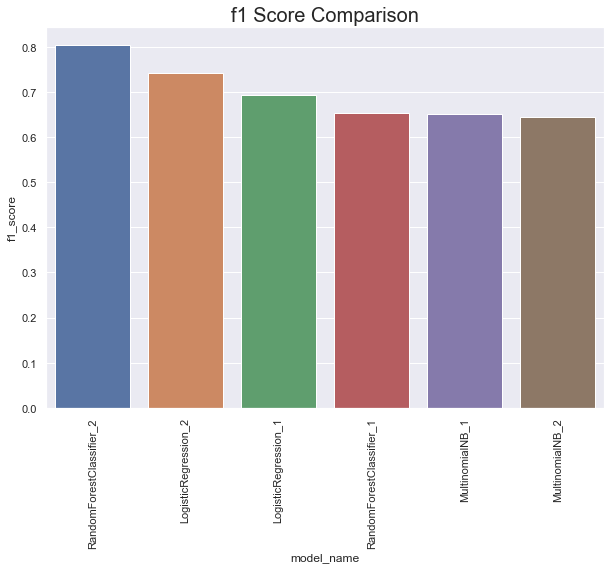

In [177]:
sns.barplot(x= 'model_name', y= 'f1_score', data = model_comp_df.sort_values('f1_score',ascending=False))
plt.title("f1 Score Comparison", fontsize = 20)
plt.xticks(rotation=90)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


<a id="eight"></a>
## 8.Pipeline Developement & Model Tuning 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


<a id="nine"></a>
## 9. Preparing the test data and submission file
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [178]:

# Making the tweetid to be the index.

df_test = df_test.set_index('tweetid')


NameError: name 'df_test' is not defined

In [ ]:

# Having a look at the first five rows of our test data
df_test.head()


,message
tweetid,
169760,Europe will now be looking to China to make su...
35326,Combine this with the polling of staffers re c...
224985,"The scary, unimpeachable evidence that climate..."
476263,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...
872928,RT @FakeWillMoore: 'Female orgasms cause globa...


In [ ]:

# Having a look at the last five rows of our test data
df_test.tail()


,message
tweetid,
895714,"RT @BrittanyBohrer: Brb, writing a poem about ..."
875167,2016: the year climate change came home: Durin...
78329,RT @loop_vanuatu: Pacific countries positive a...
867455,"RT @xanria_00018: You’re so hot, you must be t..."
470892,RT @chloebalaoing: climate change is a global ...


In [ ]:

# Selecting the index of the test dataframe.
final_test = df_test.index


In [ ]:

# Creating the submission Dataframe.
# Final_Table = {'tweetid': final_test, 'sentiment':np.round(lr_predictor, 0)}
# submission = pd.DataFrame(data = Final_Table)
# submission = submission[['tweetid', 'sentiment']]

# submission = pd.DataFrame(data = {'tweetid': df_test['tweetid'], 'sentiment': lr_predictor.astype('int')})
test = df_test['message']
testVec = betterVect.fit_transform(test)

# test_scaled = scaler.fit_transform(testVec)
y_pred = lr.predict(testVec) 

final_table = {'tweetid': df_test['tweetid'], 'sentiment': y_pred}
submission = pd.DataFrame(data = final_table)

submission[['tweetid','sentiment']].to_csv('2201DS_GM4_Submission.csv', index = False)


ValueError: X has 6910 features per sample; expecting 9057

In [ ]:

df_test = pd.read_csv("test.csv")


NameError: name 'pd' is not defined

In [ ]:

# To be adjusted.........Change the code 

final_test = df_test['message']
testVec = betterVect.transform(final_test)

y_prediction = lr.predict(testVec)

df_test['sentiment'] = y_prediction

df_test[['tweetid','sentiment']].to_csv('submission.csv', index = False)


NameError: name 'df_test' is not defined

In [ ]:

submission.set_index('tweetid').head()


NameError: name 'submission' is not defined

In [ ]:

submission.set_index('tweetid').tail()


In [ ]:

# Converting to csv file
submission.to_csv("2201DS_GM4_Submission.csv",index  = False)


<a id="ten"></a>
## 10. Final Thoughts and reccomendations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
